This script makes blank RGB maks files and a palette file for GIMP
use this is you dont have any mask data

In [ ]:
import os
import glob
import numpy as np
import rasterio
from tqdm.auto import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [35]:
base_dir = '/Users/nicholaswright/Documents/gimp_segmentation_plugin/sample data'

# this folder should contain your image files
image_dir = os.path.join(base_dir,'image')

# this folder will contain full colour mask files
full_colour_mask_folder = 'RGB mask empty'
colour_mask_dir = os.path.join(base_dir,full_colour_mask_folder)
Path(colour_mask_dir).mkdir(parents=True, exist_ok=True)

files = glob.glob(image_dir+'/*')
len(files)

15

In [36]:
# how many classes do you want? we need this to create the GIMP palette file
classes = 4

In [37]:
rgb_display = [[230,  25,  75],[ 60, 180,  75],[255, 225,  25],[ 67,  99, 216],[245, 130,  49],
                [145,  30, 180],[ 70, 240, 240],[240,  50, 230],[188, 246,  12],[250, 190, 190],
                [  0, 128, 128],[230, 190, 255],[154,  99,  36],[255, 250, 200],[128,   0,   0],
                [170, 255, 195],[128, 128,   0],[255, 216, 177],[  0,   0, 117],[128, 128, 128],
                [255, 255, 255],[  0,   0,   0]]

In [38]:
rgb_display = rgb_display[0:classes]
rgb_display

[[230, 25, 75], [60, 180, 75], [255, 225, 25], [67, 99, 216]]

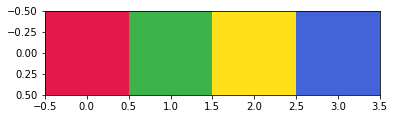

In [39]:
# these are the colours we will use
plt.imshow(np.array([rgb_display]))
plt.show()

In [40]:
# exprot palette file for gimp
export_path = os.path.join(base_dir,'Palette.txt')
np.savetxt(export_path, np.array(rgb_display,dtype=object), fmt='%s')
export_path

'/Users/nicholaswright/Documents/gimp_segmentation_plugin/sample data/Palette.txt'

In [42]:
for image in tqdm(files):
    file_name = os.path.basename(image)
    export_path = os.path.join(colour_mask_dir,file_name)
    image_open = rasterio.open(image)
    meta = image_open.meta
    array = image_open.read()
    array = np.moveaxis(array, 0, -1)
    filled = np.full_like(array, rgb_display[0])
    filled = np.moveaxis(filled, 2, 0)
    with rasterio.open(export_path, 'w', **meta) as dst:
            dst.write(filled)
    

/opt/anaconda3/envs/gispy37/lib/python3.7/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
